In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
car_data = pd.read_csv('../data/raw/cardata.csv')
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
car_data.shape

(301, 9)

In [5]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
print(car_data.Fuel_Type.value_counts())
print(car_data.Seller_Type.value_counts())
print(car_data.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [8]:
# encoding Fuel_Type, Seller_Type, Transmission
car_data.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2}}, inplace=True)

car_data.replace({'Seller_Type':{'Dealer':0, 'Individual':1}}, inplace=True)

car_data.replace({'Transmission':{'Manual':0, 'Automatic':1}}, inplace=True)

In [9]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [10]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    int64  
 6   Seller_Type    301 non-null    int64  
 7   Transmission   301 non-null    int64  
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 21.3+ KB


In [11]:
df = car_data.drop(['Car_Name'], axis=1)

In [12]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,0,0,0,0
1,2013,4.75,9.54,43000,1,0,0,0
2,2017,7.25,9.85,6900,0,0,0,0
3,2011,2.85,4.15,5200,0,0,0,0
4,2014,4.60,6.87,42450,1,0,0,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           301 non-null    int64  
 1   Selling_Price  301 non-null    float64
 2   Present_Price  301 non-null    float64
 3   Kms_Driven     301 non-null    int64  
 4   Fuel_Type      301 non-null    int64  
 5   Seller_Type    301 non-null    int64  
 6   Transmission   301 non-null    int64  
 7   Owner          301 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 18.9 KB


Checking accuracy on Different Model 


In [14]:
X = car_data.drop(['Selling_Price'], axis=1)
Y = car_data['Selling_Price']

In [50]:
X = car_data.drop(['Car_Name','Selling_Price'], axis=1)

In [51]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
import joblib

In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=42)

In [53]:
# Linear Regression
lr_reg = LinearRegression()
lr_reg.fit(X_train, Y_train)

LinearRegression()

In [54]:
# Model Evaluation
training_data_pred = lr_reg.predict(X_train)

In [55]:
error_score = metrics.r2_score(Y_train, training_data_pred)
print("R squared Error: ",error_score)

R squared Error:  0.876124919292351


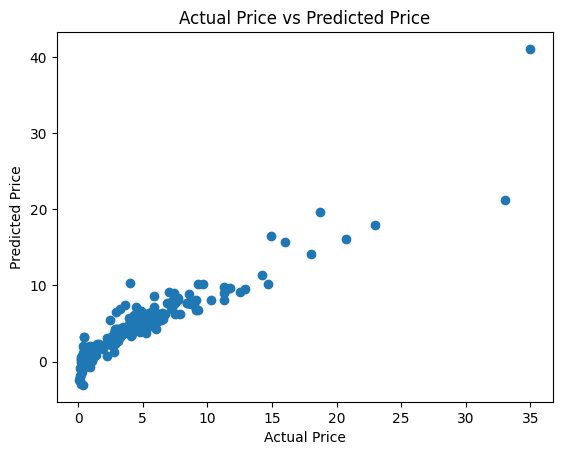

In [56]:
plt.scatter(Y_train, training_data_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

In [57]:
test_data_pred = lr_reg.predict(X_test)

In [58]:
error_score = metrics.r2_score(Y_test, test_data_pred)
print("R squared Error :", error_score)

R squared Error : 0.8773175030337913


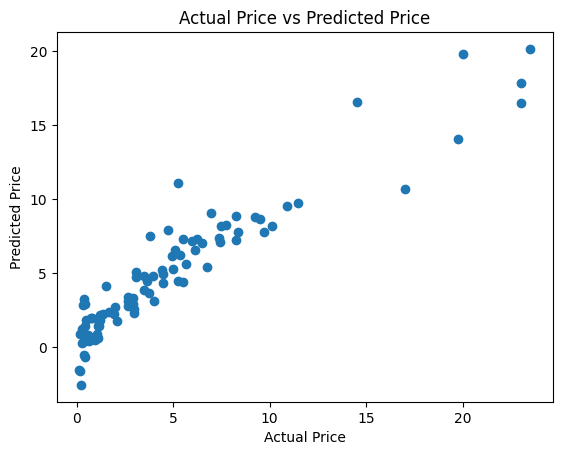

In [59]:
plt.scatter(Y_test, test_data_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

In [60]:
training_acc = r2_score(Y_train, training_data_pred)
print("Accuracy score on training data: ",round(training_acc*100,2),"%")

Accuracy score on training data:  87.61 %


In [62]:
testing_acc = r2_score(Y_test, test_data_pred)
print("Accuracy score on testing data: ",round(testing_acc*100,2),"%")

Accuracy score on testing data:  87.73 %


In [63]:
# Random Forest
rf = RandomForestRegressor()
rf.fit(X_train, Y_train)

# Gradient Boosting
gbr = GradientBoostingRegressor()
gbr.fit(X_train, Y_train)

# XGBoost
xgb = XGBRegressor()
xgb.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [64]:
y_pred_rf = rf.predict(X_test)
y_pred_gbr = gbr.predict(X_test)
y_pred_xgb = xgb.predict(X_test)

In [65]:
score_rf = r2_score(Y_test, y_pred_rf)
score_gbr = r2_score(Y_test, y_pred_gbr)
score_xgb = r2_score(Y_test, y_pred_xgb)

In [66]:
print(testing_acc, score_rf, score_gbr, score_xgb)

0.8773175030337913 0.9594608735134615 0.9565718155708794 0.9650510631605104


In [67]:
Final_output = pd.DataFrame({"Models":['LR','RF','GBR','XGB'], "R2_score":[testing_acc, score_rf, score_gbr, score_xgb]})
Final_output

,Models,R2_score
0,LR,0.877318
1,RF,0.959461
2,GBR,0.956572
3,XGB,0.965051


In [35]:
import warnings
warnings.filterwarnings('ignore')

<Axes: xlabel='Models', ylabel='R2_score'>

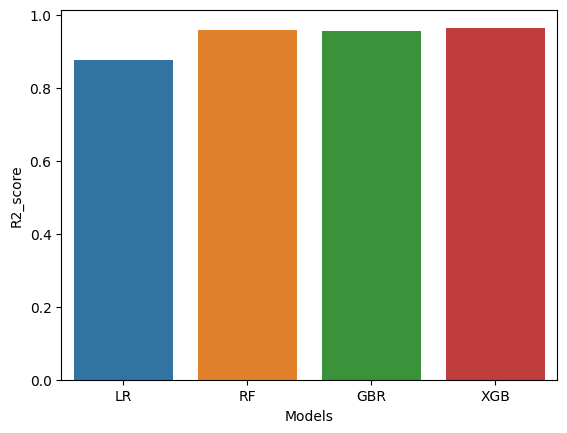

In [68]:
sns.barplot(x='Models', y='R2_score', data=Final_output)

In [69]:
xg = XGBRegressor()
xg.fit(X,Y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [70]:
joblib.dump(xg, 'car_price_pred')

['car_price_pred']

In [71]:
model = joblib.load('car_price_pred')

In [72]:
X.head()

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0


In [73]:
data_new = pd.DataFrame({
    'Year': 2018,
    'Present_Price':7.17,
    'Kms_Driven':10000,
    'Fuel_Type':2,
    'Seller_Type':1,
    'Transmission':0,
    'Owner':0
}, index=[0])

In [74]:
car_price = model.predict(data_new)

In [75]:
print(f"Predicted Car Price using XGBRegressor:{'%.3f' %car_price[0]} lakhs")

Predicted Car Price using XGBRegressor:5.695 lakhs
